In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

In [2]:
pjm = pd.read_csv('../pjm_hourly_demand.csv', index_col='time', parse_dates=True)
pjm.head()

,Demand (MW)
time,
2016-01-01 01:00:00,78661.0
2016-01-01 02:00:00,77817.0
2016-01-01 03:00:00,76287.0
2016-01-01 04:00:00,75546.0
2016-01-01 05:00:00,75832.0


<AxesSubplot:xlabel='time'>

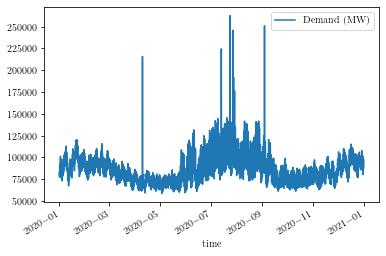

In [3]:
pjm[(pjm.index.year > 2019) & (pjm.index.year < 2021)].plot()

In [4]:
pjm[pjm['Demand (MW)'] > 150000] = np.nan
pjm.isnull().sum()

Demand (MW)    23
dtype: int64

In [5]:
pjm = pjm.interpolate('linear')
pjm.isnull().sum()

Demand (MW)    0
dtype: int64

In [6]:
df3 = pjm.copy()
df3['interval'] = 1
df3 = df3.sort_values(by=['Demand (MW)'], ascending=False)
df3['duration'] = df3['interval'].cumsum()
df3['percentage'] = df3['duration']*100/len(df3)
df3

,Demand (MW),interval,duration,percentage
time,,,,
2018-08-28 16:00:00,149971.0,1,1,0.001976
2016-08-11 14:00:00,149721.0,1,2,0.003952
2019-07-20 18:00:00,149640.0,1,3,0.005927
2018-08-28 17:00:00,149604.0,1,4,0.007903
2021-08-24 18:00:00,149590.0,1,5,0.009879
...,...,...,...,...
2020-04-13 04:00:00,59212.0,1,50608,99.992097
2020-05-03 04:00:00,59078.0,1,50609,99.994073
2020-05-03 07:00:00,59016.0,1,50610,99.996048


In [7]:
grouped = pjm.groupby(pjm.index.year)
frames = []
for g in grouped.groups:
    df = grouped.get_group(g)
    df.reset_index(inplace=True, drop=True)
    frames.append(df)
df2 = pd.concat(frames, axis=1)
df2['demand_mean'] = df2.mean(axis=1)

In [8]:
df2

,Demand (MW),Demand (MW),Demand (MW),Demand (MW),Demand (MW),Demand (MW),demand_mean
0,78661.0,83564.0,115505.0,76608.0,83534.0,86008.0,87313.333333
1,77817.0,81237.0,113670.0,73926.0,81219.0,83842.0,85285.166667
2,76287.0,80109.0,112897.0,72062.0,79460.0,82412.0,83871.166667
3,75546.0,78867.0,112446.0,70756.0,78096.0,82444.0,83025.833333
4,75832.0,77954.0,112291.0,69515.0,77566.0,82695.0,82642.166667
...,...,...,...,...,...,...,...
8754,91757.0,NaN,94016.0,96028.0,NaN,NaN,93933.666667
8755,88834.0,NaN,90385.0,93365.0,NaN,NaN,90861.333333
8756,85749.0,NaN,86724.0,90573.0,NaN,NaN,87682.000000
8757,NaN,NaN,82978.0,87907.0,NaN,NaN,85442.500000


In [9]:
pjm_average = df2
pjm_average['interval'] = 1
pjm_sorted = pjm_average.sort_values(by=['demand_mean'], ascending=False)
pjm_sorted['duration'] = pjm_sorted['interval'].cumsum()
pjm_sorted['percentage'] = pjm_sorted['duration']*100/len(pjm_sorted)
pjm_sorted

,Demand (MW),Demand (MW),Demand (MW),Demand (MW),Demand (MW),Demand (MW),demand_mean,interval,duration,percentage
4816,132263.0,146082.0,117714.0,149439.5,142989.0,136158.0,137440.916667,1,1,0.011417
4815,134364.0,145831.0,117583.0,149239.0,140987.0,134219.0,137037.166667,1,2,0.022834
4817,127729.0,145698.0,116697.0,149640.0,144329.0,136646.0,136789.833333,1,3,0.034250
4792,133243.0,146446.0,125611.0,148500.8,132048.0,128347.0,135699.300000,1,4,0.045667
4793,128177.0,146553.0,126655.0,148677.2,133864.0,129273.0,135533.200000,1,5,0.057084
...,...,...,...,...,...,...,...,...,...,...
6891,66489.0,64958.0,64788.0,66052.0,68225.0,NaN,66102.400000,1,8755,99.954333
3194,62975.0,65442.0,67369.0,66849.0,67014.0,66950.0,66099.833333,1,8756,99.965750
3195,64154.0,64611.0,66922.0,68134.0,65342.0,67030.0,66032.166667,1,8757,99.977166
6915,62974.0,65613.0,68450.0,65075.0,67875.0,NaN,65997.400000,1,8758,99.988583


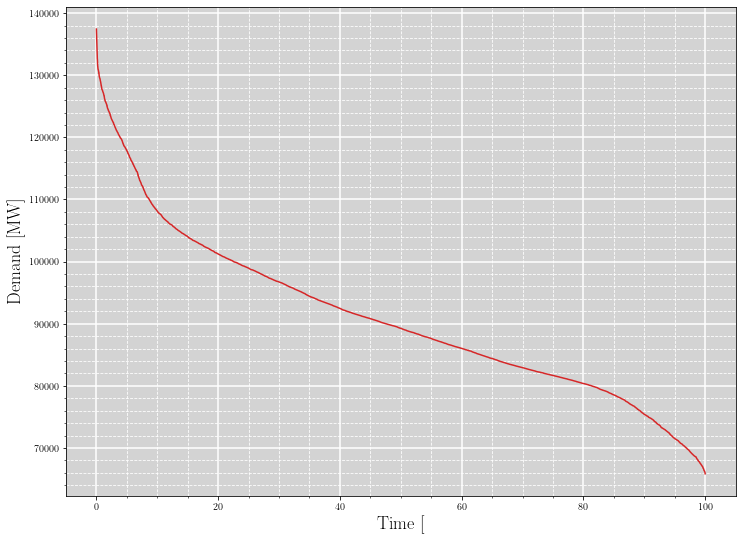

In [10]:
fig, ax = plt.subplots(figsize=(12,9))
sb.lineplot(ax=ax,x='percentage', y='demand_mean', data=pjm_sorted, color='tab:red')
ax.set_ylabel('Demand [MW]', fontsize=18)
ax.set_xlabel('Time [%]', fontsize=18)
ax.minorticks_on()
ax.grid(which='major', color='w', lw=1.5)
ax.grid(which='minor', color='w', linestyle='--')
ax.set_facecolor('lightgray')

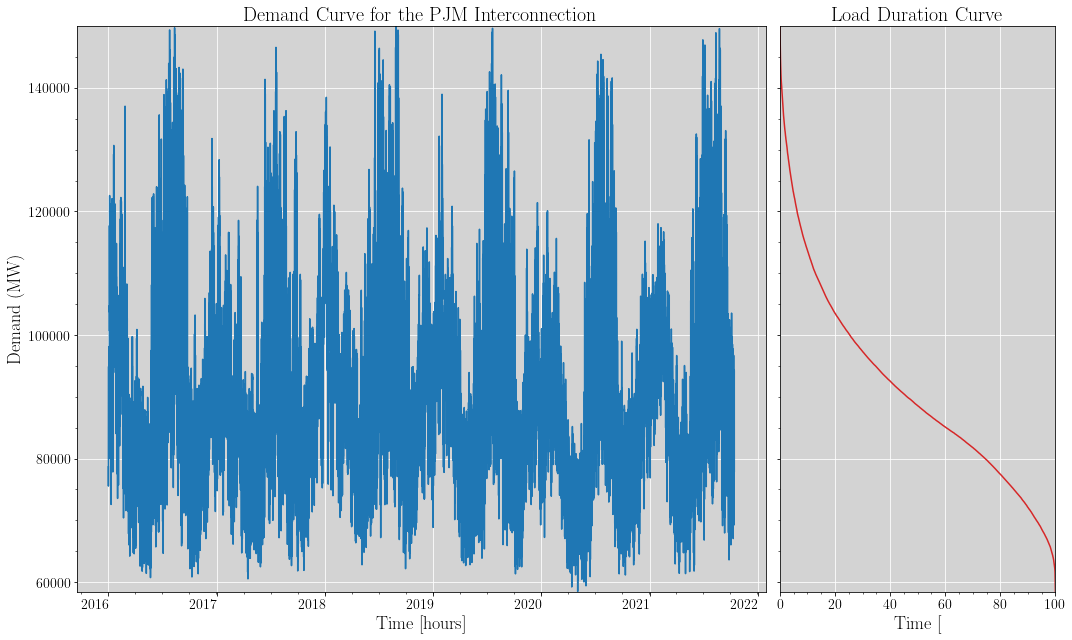

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,9), gridspec_kw={'width_ratios':[2.5,1]}, sharey=True, 
                         edgecolor='k', facecolor='w')
ax1 = axes[0]
ax2 = axes[1]
pjm.plot(ax=ax1, legend=False)
# (pjm.reset_index().sort_values(by=['Demand (MW)'], ascending=False)).plot(ax=ax2)
# sb.lineplot(ax=ax2,x='percentage', y='demand_mean', data=pjm_sorted, color='tab:red')
sb.lineplot(ax=ax2,x='percentage', y='Demand (MW)', data=df3, color='tab:red')
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(color='w')
ax2.grid(color='w')
ax1.set_ylim(min(pjm['Demand (MW)']), max(pjm['Demand (MW)']))
ax1.set_title('Demand Curve for the PJM Interconnection', fontsize=20)
ax2.set_title('Load Duration Curve', fontsize=20)
ax1.tick_params(axis='both', labelsize=14, rotation=0)
ax2.tick_params(axis='both', labelsize=14, rotation=0)
ax1.set_ylabel('Demand (MW)', fontsize=18)
ax1.set_xlabel('Time [hours]', fontsize=18)
ax2.set_xlabel('Time [%]', fontsize=18)
ax2.set_xlim(0,100)
plt.tight_layout()
# plt.savefig('../../thesis/figures/pjm_load_curves.pgf')